<a href="https://colab.research.google.com/github/CrSamson/Predicting-Heart-Disease/blob/main/Predicting_Heart_Disease_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prédire les maladies cardiaques


Nous utiliserons ce jeu de données pour prédire avec précision la probabilité qu'un nouveau patient développe une maladie cardiaque à l'avenir. Le jeu de données comporte les caractéristiques suivantes :

* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

In [ ]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break  # Assume there's only one CSV file, exit loop after finding it

# Now read the CSV file
df = pd.read_csv(csv_file_path)
print(df.head(5))

100%|██████████| 8.56k/8.56k [00:00<00:00, 10.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [ ]:
print(f"The shape of the data frame is : {df.shape}")

The shape of the data frame is : (918, 12)


Le dataframe contient 918 observations et 12 caractéristiques.

In [ ]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


L'âge moyen des patients est de 53 ans.
Un maximum de 603 pour le cholestérol et une pression artérielle au repos de 200 semblent étranges.
Une valeur minimale de 0,000 pour la pression artérielle au repos semble également anormale.

La médiane du cholestérol est supérieure à sa moyenne d'environ 25 mm/dl, ce qui indique qu'il pourrait s'agir d'une distribution asymétrique à gauche, avec la possibilité de valeurs aberrantes influençant la distribution.

In [ ]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Pas de valeurs manquantes

Quelques observations attirent l'attention. La pression artérielle au repos (RestingBP) correspond à la pression artérielle au repos, et il est peu probable qu'elle soit nulle. Mais qu'en est-il du cholestérol ? Un faible taux de cholestérol semble certainement être une bonne chose, mais il ne peut probablement pas être nul.

C’est ici que l’expertise du domaine peut nous être utile. Étant donné que nous ne sommes peut-être pas en mesure de répondre à la question, nous pourrions consulter un expert en la matière ou effectuer nos propres recherches.
Selon la description du jeu de données, Cholestérol contient les valeurs du cholestérol sérique. D’après l’American Heart Association, le cholestérol sérique :

« est une combinaison de différentes mesures. Votre cholestérol total dans le sang est calculé en additionnant vos taux de cholestérol HDL et LDL, plus 20 % de votre taux de triglycérides. »

Les informations ci-dessus suffisent à nous faire comprendre qu'une valeur de 0 pour le cholestérol sérique est peu probable.

In [ ]:
print(df.dtypes)

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [ ]:
categorical_columns = df.select_dtypes(include = ["object", "category"]).columns
print("Categorical columns: \n", categorical_columns)

numerical_columns = df.select_dtypes(include = ["number"]).columns
print("Numerical columns:\n", numerical_columns)

Categorical columns: 
 Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
Numerical columns:
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_cols = list(categorical_columns)
categorical_cols.append("FastingBS")
categorical_cols.append("HeartDisease")

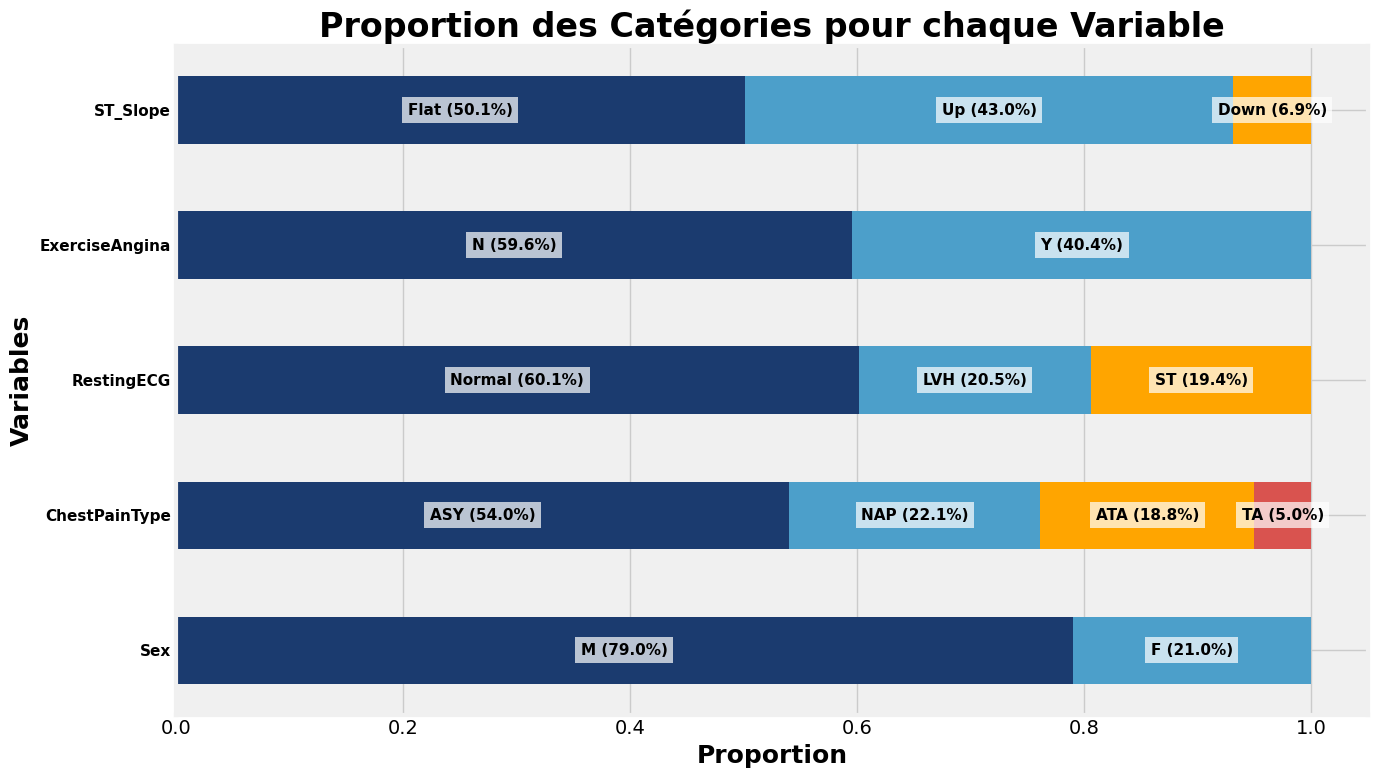

In [ ]:
# Sélectionner les colonnes catégorielles
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Configurer la taille de la figure
plt.figure(figsize=(14, 8))  # Augmentation de la hauteur pour plus de lisibilité
plt.style.use('fivethirtyeight')

# Palette de couleurs personnalisée : 4 couleurs distinctes
colors = ['#1B3B6F', '#4C9FCA', '#FFA500', '#D9534F']

# Ajouter les informations pour chaque colonne catégorielle
handles = []
labels = []
for col_idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts(normalize=True)
    categories = value_counts.index
    counts = value_counts.values
    left = 0
    for i, count in enumerate(counts):
        # Augmenter la hauteur des barres
        bar = plt.barh(col_idx, count, color=colors[i % len(colors)], left=left, height=0.5)
        plt.text(left + count / 2, col_idx, f"{categories[i]} ({count * 100:.1f}%)",
                 ha='center', va='center', color='black', weight='bold', fontsize=11,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
        if f"{categories[i]}" not in labels:
            handles.append(bar[0])
            labels.append(f"{categories[i]}")
        left += count

# Ajuster les positions des étiquettes des axes (noms des colonnes catégorielles)
plt.yticks(range(len(categorical_cols)), categorical_cols, fontsize=11, weight='bold')

# Ajouter un titre et des étiquettes
plt.xlabel('Proportion', weight='bold', size=18)
plt.ylabel('Variables', weight='bold', size=18)
plt.title('Proportion des Catégories pour chaque Variable', weight='bold', size=24)

# Ajuster l'espacement pour optimiser l'affichage
plt.tight_layout()

# Afficher la figure
plt.show()

* Le jeu de données est fortement biaisé en faveur des patients de sexe masculin. 725 lignes correspondent à des patients masculins, tandis que seulement 193 concernent des patientes. Cela pourrait potentiellement induire un biais dans notre modèle et affecter les prédictions pour les patientes dans des données non vues.
* 410 patients n'ont pas été diagnostiqués avec une maladie cardiaque, tandis que 508 l'ont été. La variable cible est relativement bien répartie, ce qui est bénéfique pour l'entraînement de notre modèle.

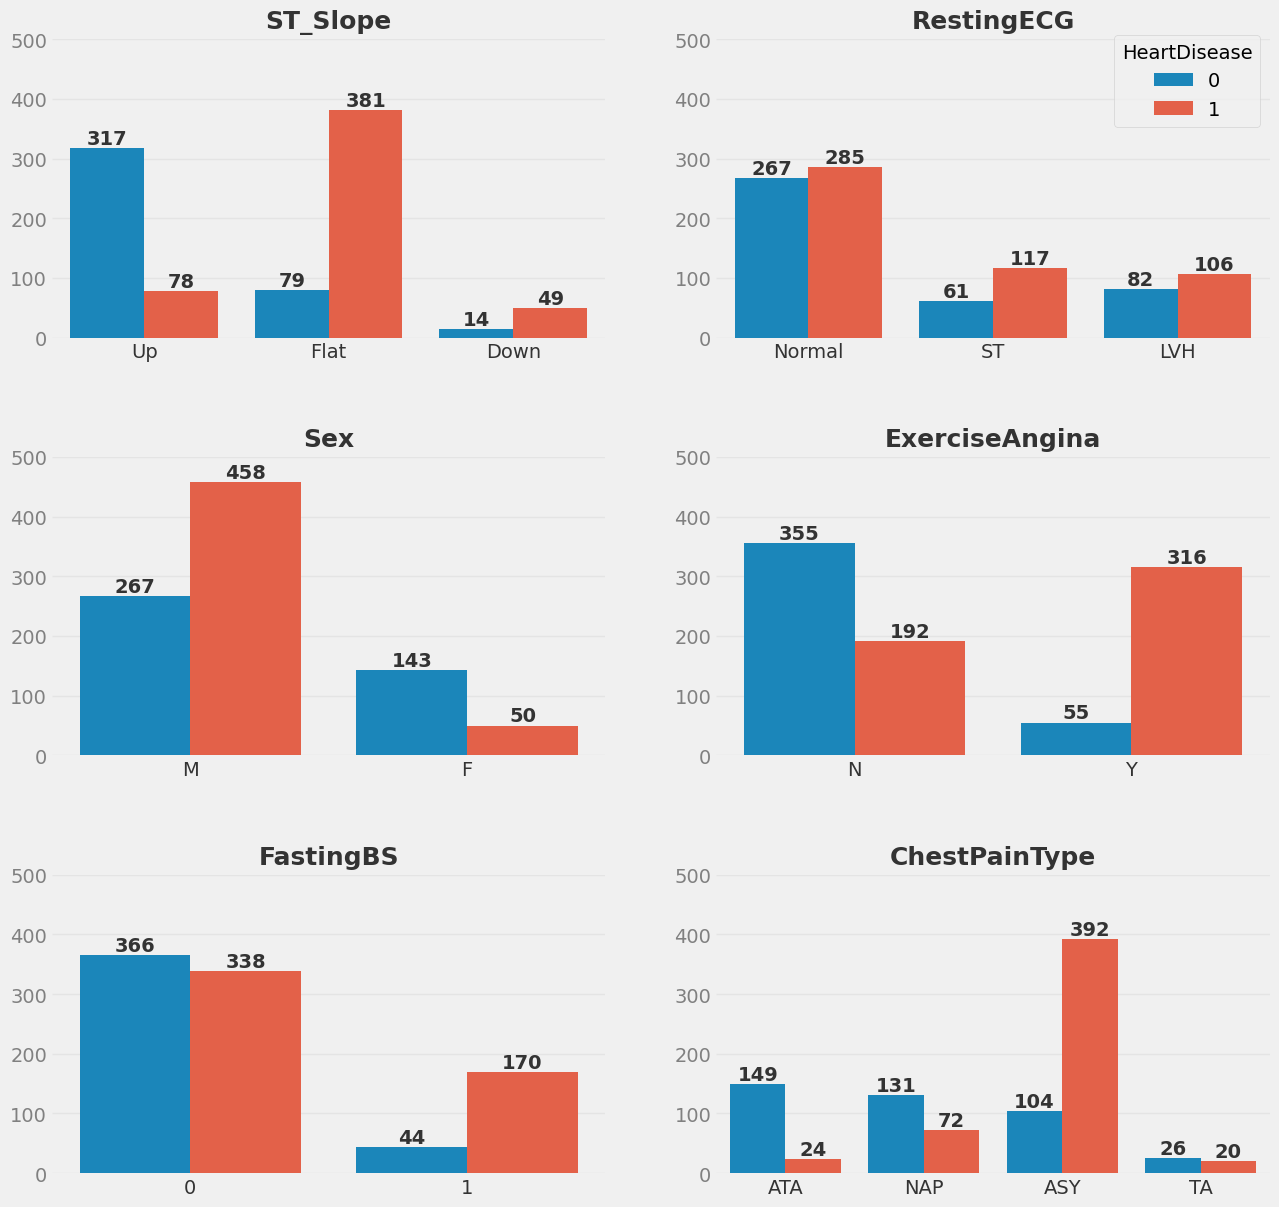

In [ ]:
# Set the figure size
fig = plt.figure(figsize=(14, 14))

# Plot countplots for each categorical column, with hue based on 'HeartDisease'
for i, col in enumerate(["ST_Slope", "RestingECG", "Sex",
                         "ExerciseAngina", "FastingBS", "ChestPainType"], start=1):
    ax = plt.subplot(3, 2, i)
    sns.countplot(x=df[col], hue=df["HeartDisease"], ax=ax)

    # Remove all spines as well as x and y-axis ticks
    ax.spines[:].set_visible(False)
    ax.tick_params(axis='both', bottom=False, left=False)

    # Set title and remove x and y-axis labels
    ax.set_title(col, weight='bold', color='#333333', size=18, pad=8)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Set y-axis limits and add horizontal grid lines
    ax.set_ylim(0, 500)
    ax.yaxis.grid(True, alpha=0.3)

    # Adjust x and y-axis labels' color
    ax.xaxis.set_tick_params(labelcolor='#333333')
    ax.tick_params(axis='y', labelcolor='grey')

    # Add bar labels to each container
    for container in ax.containers:
        ax.bar_label(container, color='#333333', weight='bold')

# Remove all legends and add one legend in the top right
for ax in fig.axes:
    ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, fontsize='medium', title='HeartDisease', bbox_to_anchor=(0.95, 0.89))

# Adjust layout to add vertical space between subplots
plt.subplots_adjust(hspace=0.4)

# Display the plot
plt.show()

* Un nombre significatif de patients, soit 392, diagnostiqués avec une maladie cardiaque, présentent une douleur thoracique asymptomatique (ASY). Bien que la douleur thoracique puisse être une caractéristique pertinente pour notre modèle, il convient de noter qu'asymptomatique implique que ces patients atteints de maladie cardiaque n'avaient pas de douleur thoracique comme symptôme.
* Un grand nombre (170) de patients ayant un taux de glycémie supérieur à 120 mg/dl ont été diagnostiqués avec une maladie cardiaque par rapport à ceux qui ne l'ont pas été.

In [ ]:
median_age_HeatDisease = df[df["HeartDisease"] == 1]["Age"].median()
print(f"The median age of patients who were diagnosed with heart disease is {median_age_HeatDisease} years old.")

The median age of patients who were diagnosed with heart disease is 57.0 years old.


In [ ]:
median_age_patients = round((df[(df["HeartDisease"] == 1) & (df["Age"] > 50) & (df["Sex"] == "M")].shape[0] / df.shape[0])*100,2)
print(f"Patients with heart disease are male and over 50 years old represent {median_age_patients}%.")

Patients with heart disease are male and over 50 years old represent 37.47%.


## Nettoyage de Données

Nous avons identifié qu'il n'y a pas de valeurs manquantes. Cependant, comme nous l'avons remarqué plus tôt, certaines colonnes contiennent des valeurs nulles qui n'ont pas de sens.

In [ ]:
# Count the number of rows that have a 0 value for RestingBP.
df[df["RestingBP"] == 0].shape[0]

1

In [ ]:
#Count the number of rows that have a 0 value for Cholesterol.
df[df["Cholesterol"] == 0].shape[0]

172

In [ ]:
df[df["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [ ]:
#Remove the single row with 0 from the RestingBP feature
df.drop(df[df["RestingBP"] == 0].index, inplace = True)
df.reset_index(drop = True)

#Validate that the drop functionned
df[df["RestingBP"] == 0].shape[0]

0

In [ ]:
# Create a mask to identify rows where the 'HeartDisease' column equals 0 (no heart disease)
hd_mask = df["HeartDisease"] == 0

# Extract the 'Cholesterol' values for rows where there is heart disease (1) and where there is no heart disease (0)
chol_with_hd = df.loc[~hd_mask, "Cholesterol"]
chol_without_hd = df.loc[hd_mask, "Cholesterol"]

# Replace 0 values in the 'Cholesterol' column for those with heart disease, replacing with the median cholesterol value for this group
df.loc[~hd_mask, "Cholesterol"] = chol_with_hd.replace(0, chol_with_hd.median())

# Replace 0 values in the 'Cholesterol' column for those without heart disease, replacing with the median cholesterol value for this group
df.loc[hd_mask, "Cholesterol"] = chol_without_hd.replace(0, chol_without_hd.median())

## Sélection des Features

In [ ]:
features = df.copy()

In [ ]:
feature_encoded = pd.get_dummies(data = features, drop_first = True)
feature_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,True,True,False,False,False,True,False,False,True
3,48,138,214,0,108,1.5,1,False,False,False,False,True,False,True,True,False
4,54,150,195,0,122,0.0,0,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,True,False,False,True,True,False,False,True,False
914,68,144,193,1,141,3.4,1,True,False,False,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,True,False,False,False,True,False,True,True,False
916,57,130,236,0,174,0.0,1,False,True,False,False,False,False,False,True,False


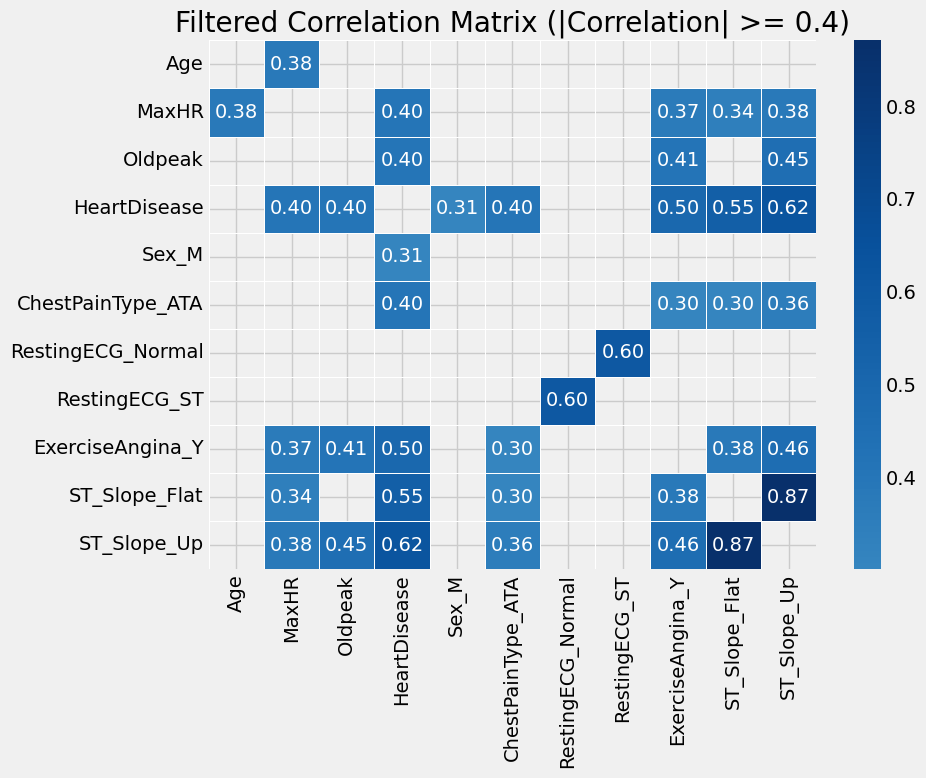

In [ ]:
import seaborn as sns
import numpy as np


correlations = abs(feature_encoded.corr())
filtered_corr_matrix = correlations[(correlations.abs() >= 0.3) & (correlations != 1.0)].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Create a heatmap of the filtered correlation matrix with a different color palette as per user's preference
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='Blues', linewidths=0.5, fmt='.2f', center=0)
plt.title('Filtered Correlation Matrix (|Correlation| >= 0.4)')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
X = feature_encoded.drop(columns = "HeartDisease", axis = 1)
y = feature_encoded["HeartDisease"]

### **Choisir les bons predicteurs pour prédire la variable cible**

L'importance des caractéristiques dans un modèle de Random Forest est déterminée par la contribution à la réduction de l'impureté et peut être mesurée de manière robuste via la réduction moyenne de l'impureté ou la permutation des valeurs.

<ipython-input-22-628879e3e770>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Feature', x='Importance', data=importance_df, palette='viridis')


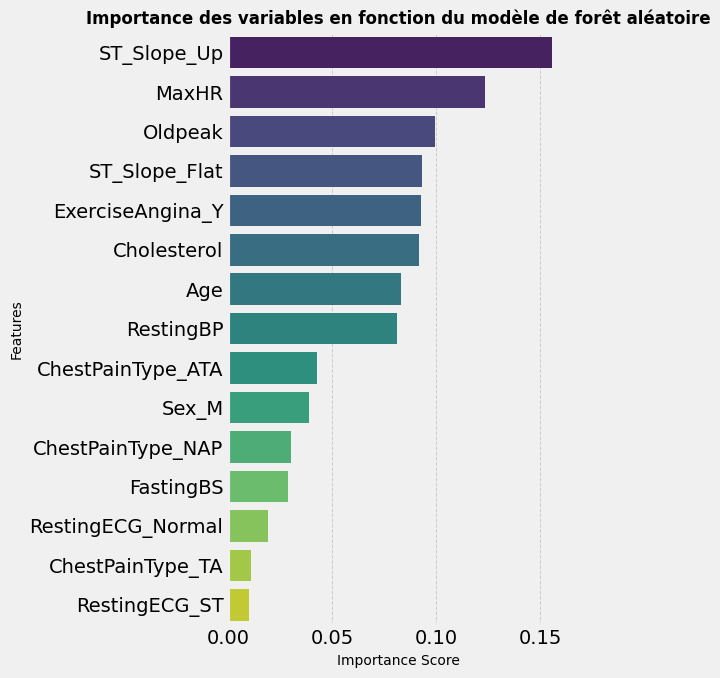

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=417)

# Training a RandomForestClassifier to determine feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extracting feature importances
feature_importances = rf_model.feature_importances_

# Creating a DataFrame for better visualization of feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plotting feature importance
plt.figure(figsize=(6, 7))
sns.barplot(y='Feature', x='Importance', data=importance_df, palette='viridis')
plt.title('Importance des variables en fonction du modèle de forêt aléatoire', fontsize=12, weight='bold')
plt.xlabel('Importance Score', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.grid(axis='x', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

On remarque que la variable ST_Slope_Up démontre la plus grande importance car elle permettait le plus de réduire efficacement l'indice d'impurété des arbres dans le RandomForest. Cette variable permettait surement de mieux séparer les individus ayant un risque accru de maladie cardiaque. Les variables suivantes sont dans le top 5 d'importance et valent la peine d'être explorés : 'ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'Cholesterol'

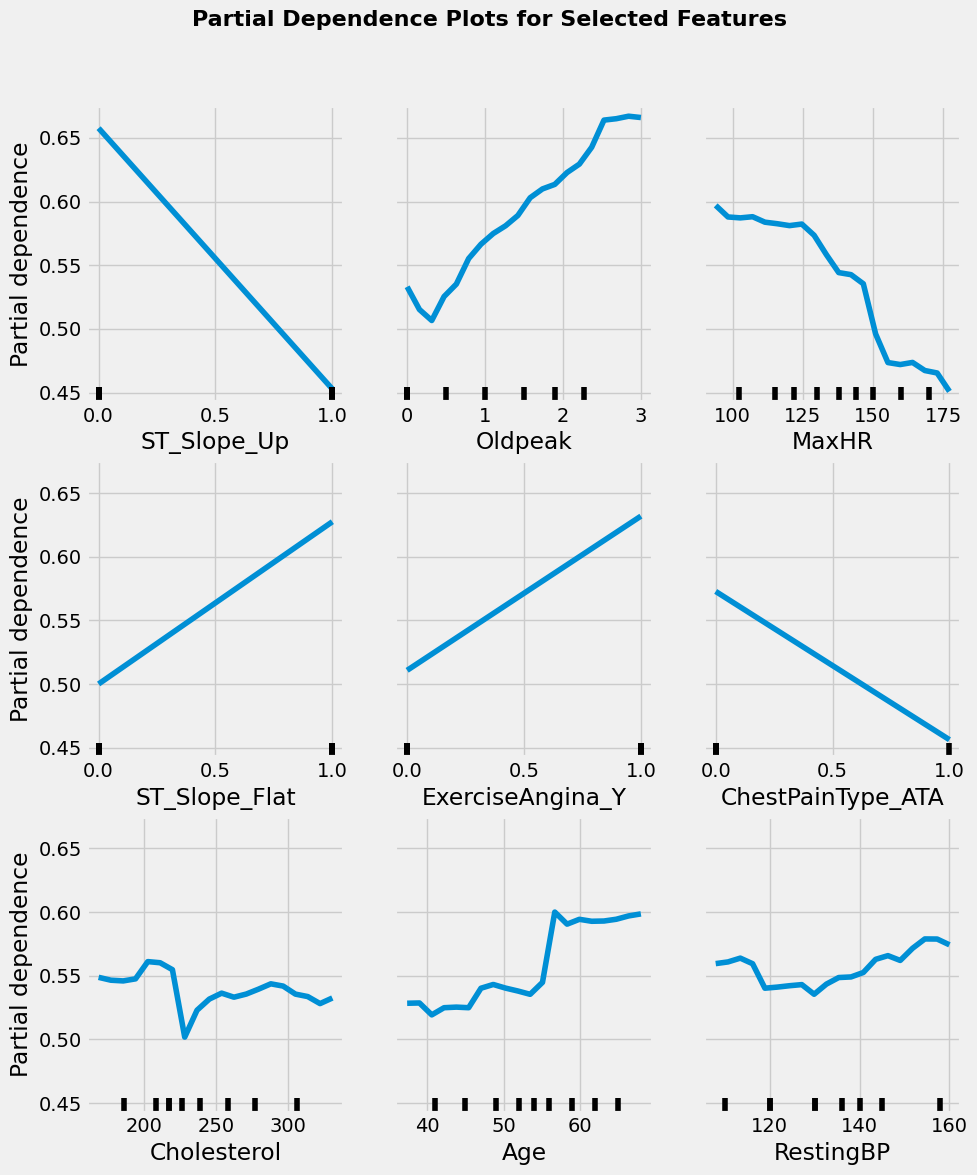

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Features to plot Partial Dependence Plots for
features_to_plot = ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y' ,'ChestPainType_ATA', 'Cholesterol', 'Age', 'RestingBP']

# Plotting Partial Dependence Plots for the selected features
fig, ax = plt.subplots(figsize=(10, 12))
# Use PartialDependenceDisplay.from_estimator instead of plot_partial_dependence
display = PartialDependenceDisplay.from_estimator(
    rf_model, X_train, features_to_plot, ax=ax, grid_resolution=20
)

plt.suptitle('Partial Dependence Plots for Selected Features', fontsize=16, weight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # To adjust the title positioning
plt.show()


* ST_Slope_Up et MaxHR ont une relation négative avec la probabilité de maladie cardiaque, ce qui signifie qu'une augmentation de ces valeurs réduit le risque.
* Oldpeak et ST_Slope_Flat ont une relation positive avec la maladie cardiaque, indiquant qu'une augmentation de ces valeurs est associée à un risque plus élevé de maladie cardiaque.
* Cholesterol ne montre pas une relation très claire, ce qui peut indiquer un faible impact direct ou une relation non linéaire complexe avec la maladie cardiaque.






# Construction d'un Classifier - K-NN

In [ ]:
#Diviser les données en un ensemble d'entrainement et de test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 417)

feature_list = ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y' ,'ChestPainType_ATA', 'Cholesterol', 'Age', 'RestingBP']

for feature in feature_list:
    knn = KNeighborsClassifier(n_neighbors = 4)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f'The k-NN classifier trained on "{feature}" with k=4 has an accuracy of {accuracy*100:.2f}%')

The k-NN classifier trained on "ST_Slope_Up" with k=4 has an accuracy of 84.06%
The k-NN classifier trained on "Oldpeak" with k=4 has an accuracy of 76.09%
The k-NN classifier trained on "MaxHR" with k=4 has an accuracy of 60.14%
The k-NN classifier trained on "ST_Slope_Flat" with k=4 has an accuracy of 81.88%
The k-NN classifier trained on "ExerciseAngina_Y" with k=4 has an accuracy of 73.19%
The k-NN classifier trained on "ChestPainType_ATA" with k=4 has an accuracy of 44.93%
The k-NN classifier trained on "Cholesterol" with k=4 has an accuracy of 63.04%
The k-NN classifier trained on "Age" with k=4 has an accuracy of 49.28%
The k-NN classifier trained on "RestingBP" with k=4 has an accuracy of 53.62%




1.  ST_Slope_Up et ST_Slope_Flat ont des performances significatives avec des précisions de 84,06 % et 81,88 %, respectivement. Cela indique que ces caractéristiques sont très discriminantes pour prédire la présence de maladies cardiaques.
2.   Oldpeak présente une précision de 76,09 %, ce qui est également assez élevé. Cela montre que cette caractéristique a un pouvoir discriminatif important.
3. ExerciseAngina_Y a une précision de 73,19 %, ce qui en fait une caractéristique raisonnablement utile.

4. MaxHR et Cholesterol ont des précisions modérées de 60,14 % et 63,04 %, respectivement. Cela signifie que, même si ces caractéristiques apportent de l'information, elles ne sont pas aussi discriminantes.

5. Age, RestingBP et ChestPainType_ATA ont des précisions inférieures à 55 %, suggérant qu'elles sont peu informatives lorsqu'elles sont utilisées seules pour entraîner un modèle k-NN.

### Construction d'un classifier K-NN avec plusieurs features

In [ ]:
scaler = MinMaxScaler()

feature_list = ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y']

X_train_scaled = scaler.fit_transform(X_train[feature_list])
X_val_scaled = scaler.transform(X_val[feature_list])

knn = KNeighborsClassifier(n_neighbors = 4)

knn.fit(X_train_scaled, y_train)

accuracy = knn.score(X_val_scaled, y_val)

print(f'The k-NN classifier trained on "{feature_list}" with k=4 has an accuracy of {accuracy*100:.2f}%')

The k-NN classifier trained on "['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y']" with k=4 has an accuracy of 75.36%


### Réglage des hyperparamètres

In [ ]:
from sklearn.model_selection import GridSearchCV
#Diviser les données en un ensemble d'entrainement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 417)

# Select features for the model
features = ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y']

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

grid_params = {"n_neighbors" : range(1, 10),
               "weights" : ["uniform", "distance"]
              }
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring = "accuracy")

knn_grid.fit(X_train_scaled, y_train)

best_params = knn_grid.best_params_
best_score = knn_grid.best_score_
best_model = knn_grid.best_estimator_

print(best_score)
print(best_params)
print(best_model)
print(f'The k-NN classifier trained on "{features}" with k="{list(best_params.values())[1]}" has an accuracy of {best_score*100:.2f}%')

0.8189578163771711
{'n_neighbors': 9, 'weights': 'uniform'}
KNeighborsClassifier(n_neighbors=9)
The k-NN classifier trained on "['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y']" with k="uniform" has an accuracy of 81.90%


### Évaluation du modèle sur l'ensemble de test

Faire une analyse PDP.
Les PDPs montrent comment la valeur d'une caractéristique individuelle affecte la prédiction du modèle, tout en maintenant toutes les autres caractéristiques constantes.


In [ ]:
# Select features for the model
features = ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y']

#Scale the same features from the test set
X_test_scaled = scaler.transform(X_test[features])

accuracy_knn = knn_grid.best_estimator_.score(X_test_scaled, y_test)

print(f"K-NN Model accuracy on test set: {accuracy_knn*100:.2f}%")

K-NN Model accuracy on test set: 84.06%


# DECISION TREE, RANDOM FOREST, GRADIENT BOOSTING & XGBOOST

Nous allons maintenant entraîner des modèles plus avancés pour comparer leurs performances à celles de notre classificateur k-NN et voir si nos conclusions en seront affectées.

In [ ]:
# Preparing the data
#features = ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y']
features = ['ST_Slope_Up', 'Oldpeak', 'MaxHR', 'ST_Slope_Flat', 'ExerciseAngina_Y']
X_train_scaled = scaler.fit_transform(X_train[features])
X_test_scaled = scaler.transform(X_test[features])

# Dictionary to store all models and their results
models = {}

In [ ]:
# Ajouter K-NN
models['K-NN'] = knn_grid

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Decision Tree
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=417)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train_scaled, y_train)
models['Decision Tree'] = dt_grid

y_pred_dt = dt_grid.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree model on the val set: {accuracy_dt:.4f}")

Accuracy of the Decision Tree model on the val set: 0.8188


In [ ]:
print("Best hyperparameters for the Decision Tree model:", dt_grid.best_params_)

Best hyperparameters for the Decision Tree model: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 2. Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=417)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train_scaled, y_train)
models['Random Forest'] = rf_grid

y_pred_rf = rf_grid.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model on the test set: {accuracy_rf:.4f}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy of the Random Forest model on the test set: 0.8478


In [ ]:
print("Best hyperparameters for the Decision Tree model:", rf_grid.best_params_)

Best hyperparameters for the Decision Tree model: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# 3. Gradient Boosting
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gb = GradientBoostingClassifier(random_state=417)
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train_scaled, y_train)
models['Gradient Boosting'] = gb_grid

y_pred_gb = gb_grid.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy of the Gradient Boost model on the test set: {accuracy_gb:.4f}")

Accuracy of the Gradient Boost model on the test set: 0.8333


In [ ]:
print("Best hyperparameters for the Decision Tree model:", gb_grid.best_params_)

Best hyperparameters for the Decision Tree model: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


## XGBoost

In [ ]:
import xgboost as xgb

# 4. XGBoost
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5]
}

xgb_model = xgb.XGBClassifier(random_state=417)
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train_scaled, y_train)
models['XGBoost'] = xgb_grid

y_pred_xgb = xgb_grid.predict(X_test_scaled)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of the XGBoost model on the test set: {accuracy_xgb:.4f}")

Accuracy of the XGBoost model on the test set: 0.8333


In [ ]:
print("Best hyperparameters for the Decision Tree model:", xgb_grid.best_params_)

Best hyperparameters for the Decision Tree model: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}


In [ ]:
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                             roc_curve, auc, confusion_matrix, mean_squared_error,
                             precision_score, f1_score)

# Comparer les modèles
results = []
for name, model in models.items():
    # Prédictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    mse = mean_squared_error(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    sensitivity = cm[1, 1] / (cm[1, 1] + cm[1, 0])  # Rappel (sensibilité)
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

    # Ajouter les résultats dans la liste
    results.append({
        'Model': name,
        'Best Parameters': model.best_params_,
        'CV Accuracy': model.best_score_,
        'Test Accuracy': accuracy,
        'MSE': mse,
        'AUC-ROC': auc_score,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'Precision': precision,
        'F1-Score': f1
    })

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame(results)

# Afficher le tableau
print("\nModel Comparison:")
print(results_df[['Model', 'CV Accuracy', 'Test Accuracy', 'MSE', 'AUC-ROC', 'Sensitivity', 'Specificity', 'Precision', 'F1-Score']])



Model Comparison:
               Model  CV Accuracy  Test Accuracy       MSE   AUC-ROC  \
0               K-NN     0.818958       0.840580  0.159420  0.888370   
1      Decision Tree     0.813830       0.818841  0.181159  0.863752   
2      Random Forest     0.830521       0.847826  0.152174  0.905242   
3  Gradient Boosting     0.830554       0.833333  0.166667  0.910335   
4            XGBoost     0.835682       0.833333  0.166667  0.894949   

   Sensitivity  Specificity  Precision  F1-Score  
0     0.868421     0.806452   0.846154  0.857143  
1     0.815789     0.822581   0.849315  0.832215  
2     0.855263     0.838710   0.866667  0.860927  
3     0.855263     0.806452   0.844156  0.849673  
4     0.842105     0.822581   0.853333  0.847682  


In [ ]:
from tabulate import tabulate

print(tabulate(results_df[['Model', 'CV Accuracy', 'Test Accuracy', 'MSE', 'AUC-ROC', 'Sensitivity', 'Specificity']],
               headers='keys',
               tablefmt='fancy_grid'))

╒════╤═══════════════════╤═══════════════╤═════════════════╤════════╤═══════════╤═══════════════╤═══════════════╕
│    │ Model             │   CV Accuracy │   Test Accuracy │    MSE │   AUC-ROC │   Sensitivity │   Specificity │
╞════╪═══════════════════╪═══════════════╪═════════════════╪════════╪═══════════╪═══════════════╪═══════════════╡
│  0 │ K-NN              │        0.819  │          0.8406 │ 0.1594 │    0.8884 │        0.8684 │        0.8065 │
├────┼───────────────────┼───────────────┼─────────────────┼────────┼───────────┼───────────────┼───────────────┤
│  1 │ Decision Tree     │        0.8138 │          0.8188 │ 0.1812 │    0.8638 │        0.8158 │        0.8226 │
├────┼───────────────────┼───────────────┼─────────────────┼────────┼───────────┼───────────────┼───────────────┤
│  2 │ Random Forest     │        0.8305 │          0.8478 │ 0.1522 │    0.9052 │        0.8553 │        0.8387 │
├────┼───────────────────┼───────────────┼─────────────────┼────────┼───────────┼───────

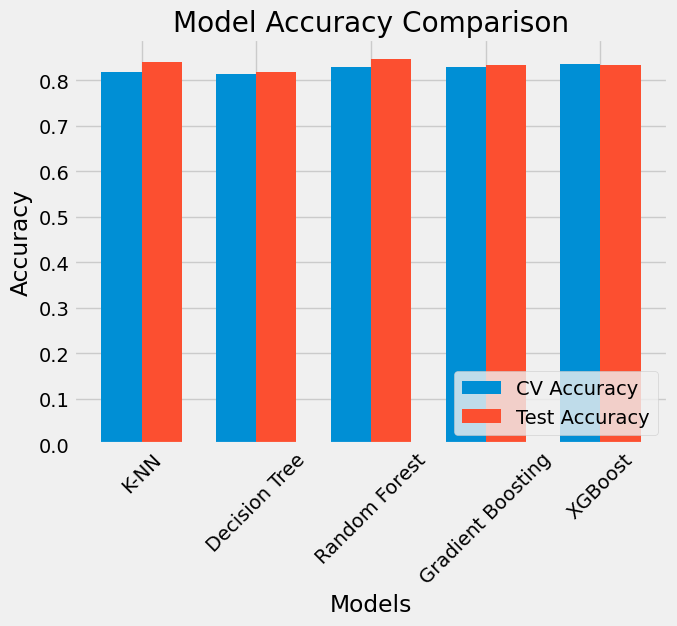

In [ ]:
plt.figure(figsize=(15, 5))

# Plot 1: Comparaison des Accuracy
plt.subplot(1, 2, 1)
x = np.arange(len(results_df['Model']))
width = 0.35

plt.bar(x - width/2, results_df['CV Accuracy'], width, label='CV Accuracy')
plt.bar(x + width/2, results_df['Test Accuracy'], width, label='Test Accuracy')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, results_df['Model'], rotation=45)
plt.legend(loc='lower right')

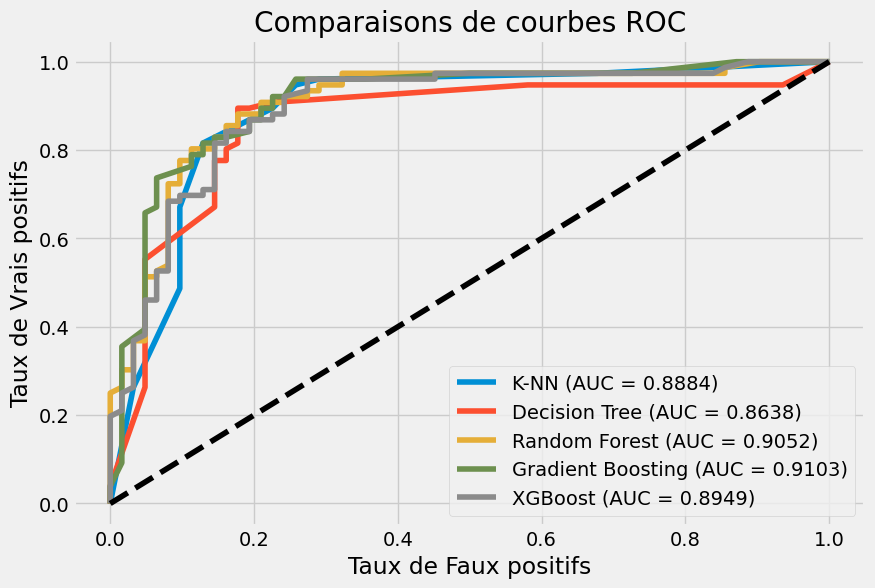

In [ ]:
plt.figure(figsize=(20, 6))

# Plot 2: Courbes ROC
plt.subplot(1, 2, 2)
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de Faux positifs')
plt.ylabel('Taux de Vrais positifs')
plt.title('Comparaisons de courbes ROC')
plt.legend(loc='lower right')

plt.show()

<Figure size 3000x600 with 0 Axes>

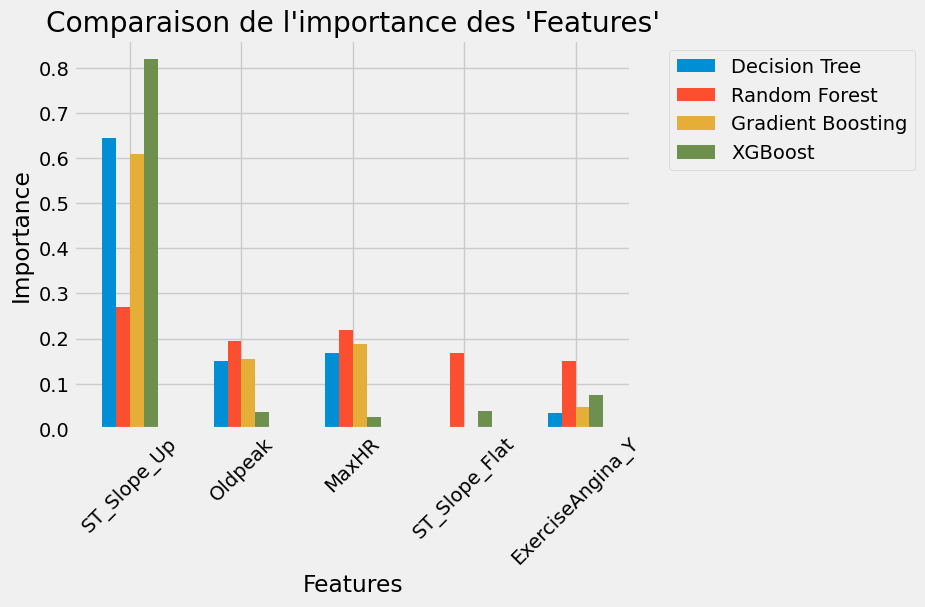

In [ ]:
# Comparaison de l'importance des différentes Features
plt.figure(figsize=(30, 6))

importance_df = pd.DataFrame()

for name, model in models.items():
    if hasattr(model.best_estimator_, 'feature_importances_'):
        importance_df[name] = pd.Series(model.best_estimator_.feature_importances_, index=features)

importance_df.plot(kind='bar')
plt.title("Comparaison de l'importance des 'Features'")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Print best model details
best_model_name = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nBest Model: {best_model_name}")
print(f"Best Parameters: {best_model.best_params_}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, best_model.predict(X_test_scaled)))


Best Model: Random Forest
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        62
           1       0.87      0.86      0.86        76

    accuracy                           0.85       138
   macro avg       0.85      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138



# Modèle de réseau de neurones

### 1. MLPClassifier avec une architecture avec deux couches cachées (de tailles 100 et 50)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Création et entraînement du MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, alpha=0.001,
                    solver='adam', random_state=42, learning_rate_init=0.01)

# Entraînement du modèle
mlp.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = mlp.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = tn / (tn + fp)  # Specificité = TN / (TN + FP)
sensitivity = recall_score(y_test, y_pred)  # Sensibilité = TP / (TP + FN)
f1 = f1_score(y_test, y_pred)

# Affichage des métriques
print(f"Global Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

# Rapport de classification complet
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Global Accuracy: 74.46%
Precision: 91.14%
Specificity: 90.28%
Sensitivity: 64.29%
F1-Score: 75.39%

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.90      0.73        72
           1       0.91      0.64      0.75       112

    accuracy                           0.74       184
   macro avg       0.77      0.77      0.74       184
weighted avg       0.80      0.74      0.75       184



### 2. Réseau de neurones plus simples et plus stables avec les données numériques normalisés

In [ ]:
#1. Import des bibliothèques
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from keras.optimizers import Adam
from keras.regularizers import l2
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
# Téléchargers la version la plus récente du fichier Kaggle
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

# Trouver le CSV file dans le downloaded directory
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(path, filename)
        break

# Lire le ficheir CSV
heart_data = pd.read_csv(csv_file_path)

Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/heart-failure-prediction/versions/1


In [ ]:
# Count the number of rows that have a 0 value for RestingBP.
heart_data[heart_data["RestingBP"] == 0].shape[0]

1

In [ ]:
#Count the number of rows that have a 0 value for Cholesterol.
heart_data[heart_data["Cholesterol"] == 0].shape[0]

172

In [ ]:
#Remove the single row with 0 from the RestingBP feature
heart_data.drop(heart_data[heart_data["RestingBP"] == 0].index, inplace = True)
heart_data.reset_index(drop = True)

#Validate that the drop functionned
heart_data[heart_data["RestingBP"] == 0].shape[0]

0

In [ ]:
# Create a mask to identify rows where the 'HeartDisease' column equals 0 (no heart disease)
hd_mask = heart_data["HeartDisease"] == 0

# Extract the 'Cholesterol' values for rows where there is heart disease (1) and where there is no heart disease (0)
chol_with_hd = heart_data.loc[~hd_mask, "Cholesterol"]
chol_without_hd = heart_data.loc[hd_mask, "Cholesterol"]

# Replace 0 values in the 'Cholesterol' column for those with heart disease, replacing with the median cholesterol value for this group
heart_data.loc[~hd_mask, "Cholesterol"] = chol_with_hd.replace(0, chol_with_hd.median())

# Replace 0 values in the 'Cholesterol' column for those without heart disease, replacing with the median cholesterol value for this group
heart_data.loc[hd_mask, "Cholesterol"] = chol_without_hd.replace(0, chol_without_hd.median())

In [ ]:
#Créer le training et le test set
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

X = pd.get_dummies(X, drop_first=True)

numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
boolean_cols = [col for col in X.columns if col not in numeric_cols]

X[boolean_cols] = X[boolean_cols].astype(int)  # Conversion des booléens en entiers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalisation uniquement des colonnes numériques
scaler = StandardScaler() #Standardise les données en centrant leur moyenne à 0 et en réduisant leur écart-type à 1.
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols]) #Les données d'entraînement sont ajustées et transformées (fit_transform) pour établir la normalisation.
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols]) #Les données de test sont uniquement transformées (transform), car les statistiques de normalisation doivent provenir uniquement des données d'entraînement.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score,
                             roc_curve, auc, confusion_matrix, mean_squared_error,
                             precision_score, f1_score)
# Fixer les graines aléatoires
np.random.seed(42)
tf.random.set_seed(42)

# Création du modèle de réseau de neurones à 2 couches cachées et 1 de sortie
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Callback pour arrêter l'entraînement
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entraînement du modèle
model_rn1 = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping], verbose=1)

# Prédictions sur l'ensemble de test
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.45148351788520813).astype(int).flatten()  # Convertir les probabilités en prédictions binaires

# Calcul des métriques
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

global_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = tn / (tn + fp)  # Specificité = TN / (TN + FP)
sensitivity = recall_score(y_test, y_pred)  # Sensibilité = TP / (TP + FN)
f1 = f1_score(y_test, y_pred)

# Affichage des métriques
print(f"Global Accuracy: {global_accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Specificity: {specificity * 100:.2f}%")
print(f"Sensitivity: {sensitivity * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7095 - loss: 1.4334 - val_accuracy: 0.7826 - val_loss: 1.3777
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8023 - loss: 1.2329 - val_accuracy: 0.8152 - val_loss: 1.2796
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8182 - loss: 1.1263 - val_accuracy: 0.8261 - val_loss: 1.1961
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8404 - loss: 1.0499 - val_accuracy: 0.8424 - val_loss: 1.1237
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8460 - loss: 0.9806 - val_accuracy: 0.8424 - val_loss: 1.0552
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8539 - loss: 0.9072 - val_accuracy: 0.8424 - val_loss: 0.9928
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8616 - loss: 0.8559 - val_accuracy: 0.8533 - val_loss: 0.9356
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8557 - loss: 0.8321 - val_accuracy: 0.8424 - val_loss: 0.8848
Ep

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


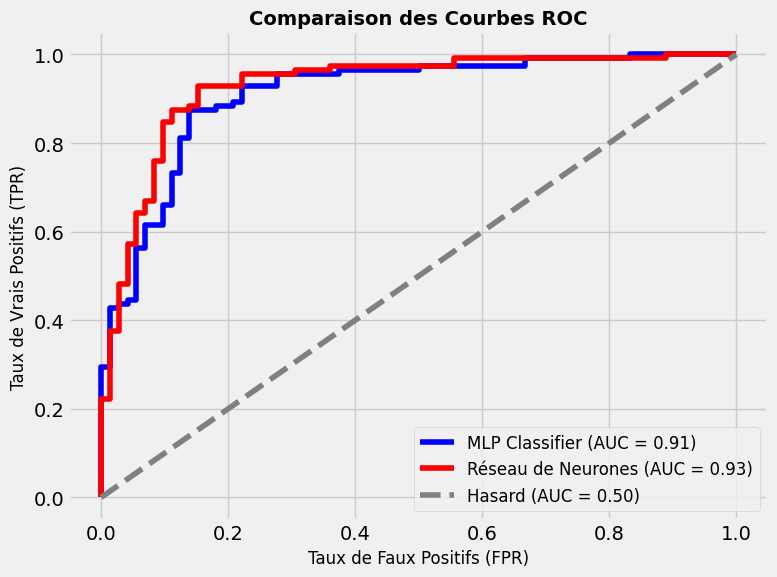

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Prédictions des probabilités des modèles
# Exemple : prédictions pour deux modèles sur un même ensemble de test
y_pred_proba_mlp = mlp.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour le modèle de MLP
y_pred_proba_modelrn = model.predict(X_test_scaled).flatten()  # Probabilités pour le réseau de neurones à 2 couches

# Calcul des courbes ROC et AUC pour les deux modèles
fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba_mlp)
auc_score1 = roc_auc_score(y_test, y_pred_proba_mlp)

fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba_modelrn)
auc_score2 = roc_auc_score(y_test, y_pred_proba_modelrn)

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', label=f'MLP Classifier (AUC = {auc_score1:.2f})')
plt.plot(fpr2, tpr2, color='red', label=f'Réseau de Neurones (AUC = {auc_score2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Hasard (AUC = 0.50)')

# Ajouter des annotations
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Comparaison des Courbes ROC', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Seuil optimal pour MLP: 0.5582879142010795
Seuil optimal pour Réseau de Neurones: 0.45148351788520813


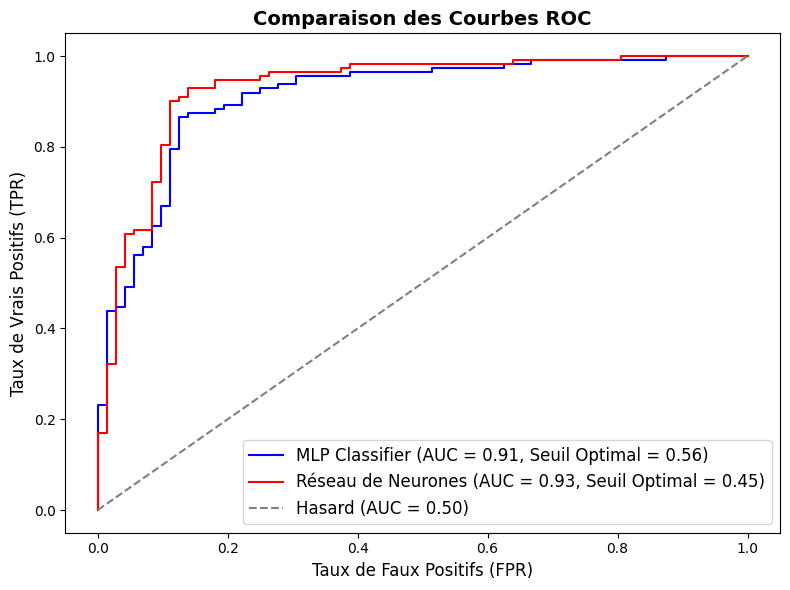

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Prédictions des probabilités des modèles
y_pred_proba_mlp = mlp.predict_proba(X_test_scaled)[:, 1]  # Probabilités pour le modèle MLP
y_pred_proba_modelrn = model.predict(X_test_scaled).flatten()  # Probabilités pour le réseau de neurones à 2 couches

# Calcul des courbes ROC et AUC pour les deux modèles
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba_mlp)
auc_score1 = roc_auc_score(y_test, y_pred_proba_mlp)

fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba_modelrn)
auc_score2 = roc_auc_score(y_test, y_pred_proba_modelrn)

# Calcul du critère de Youden pour chaque modèle
youden_index1 = tpr1 - fpr1
optimal_idx1 = np.argmax(youden_index1)
optimal_threshold1 = thresholds1[optimal_idx1]

youden_index2 = tpr2 - fpr2
optimal_idx2 = np.argmax(youden_index2)
optimal_threshold2 = thresholds2[optimal_idx2]

# Affichage des résultats
print(f"Seuil optimal pour MLP: {optimal_threshold1}")
print(f"Seuil optimal pour Réseau de Neurones: {optimal_threshold2}")

# Création du graphique
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', label=f'MLP Classifier (AUC = {auc_score1:.2f}, Seuil Optimal = {optimal_threshold1:.2f})')
plt.plot(fpr2, tpr2, color='red', label=f'Réseau de Neurones (AUC = {auc_score2:.2f}, Seuil Optimal = {optimal_threshold2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Hasard (AUC = 0.50)')

# Ajouter des annotations
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('Comparaison des Courbes ROC', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)

# Affichage du graphique
plt.tight_layout()
plt.show()

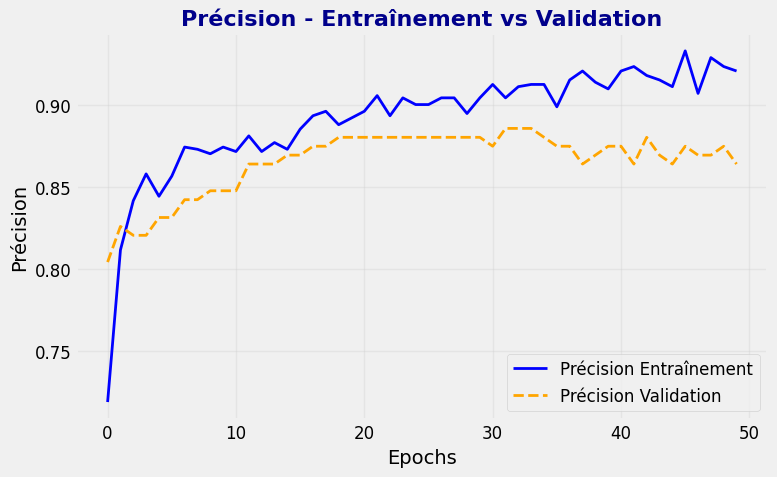

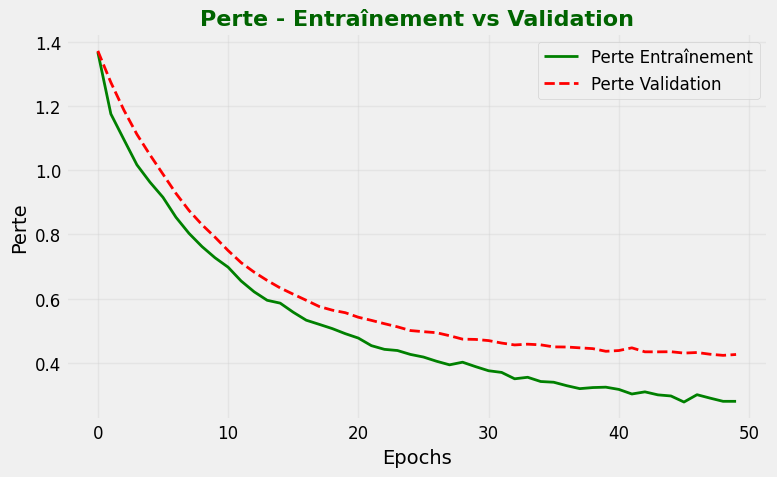

In [ ]:
# Fonction pour visualiser la précision et la perte
def plot_training_history(history):
    # Graphique pour la précision
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Précision Entraînement', color='blue', linestyle='-', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Précision Validation', color='orange', linestyle='--', linewidth=2)
    plt.title('Précision - Entraînement vs Validation', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Précision', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, loc='lower right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Graphique pour la perte
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Perte Entraînement', color='green', linestyle='-', linewidth=2)
    plt.plot(history.history['val_loss'], label='Perte Validation', color='red', linestyle='--', linewidth=2)
    plt.title('Perte - Entraînement vs Validation', fontsize=16, fontweight='bold', color='darkgreen')
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Perte', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(fontsize=12, loc='upper right')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Appeler la fonction pour afficher les graphiques
plot_training_history(model_rn1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


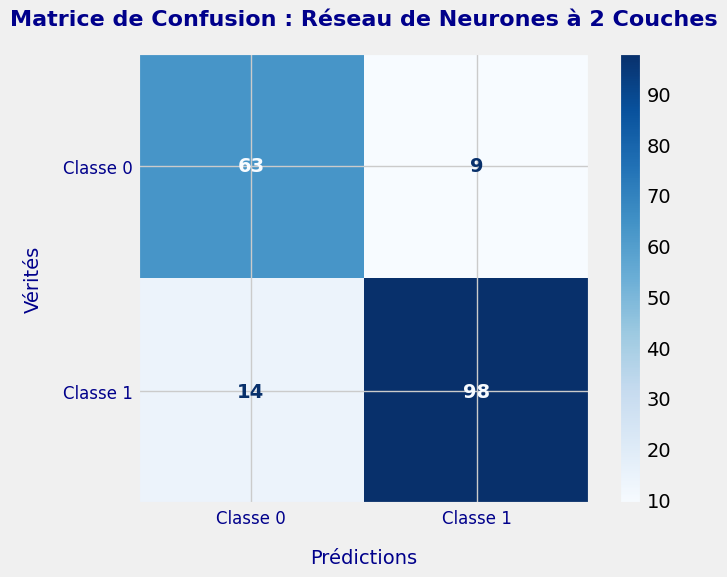

In [ ]:
# Prédictions sur les données de test
y_pred = model.predict(X_test_scaled)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convertir les probabilités en classes (0 ou 1)

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Affichage de la matrice de confusion avec des améliorations esthétiques
fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Classe 0", "Classe 1"])
disp.plot(cmap="Blues", ax=ax, colorbar=False)

# Personnalisation
ax.set_title("Matrice de Confusion : Réseau de Neurones à 2 Couches", fontsize=16, fontweight='bold', pad=20, color="darkblue")
ax.set_xlabel("Prédictions", fontsize=14, labelpad=15, color="darkblue")
ax.set_ylabel("Vérités", fontsize=14, labelpad=15, color="darkblue")
ax.tick_params(axis='both', which='major', labelsize=12, colors="darkblue")

# Ajouter des annotations supplémentaires
for text in ax.texts:
    text.set_fontsize(14)  # Augmenter la taille des annotations dans les cases
    text.set_fontweight('bold')  # Rendre les annotations plus visibles

# Ajouter une barre de couleurs (optionnel)
plt.colorbar(ax.images[0], ax=ax, fraction=0.046, pad=0.04)

# Ajuster la mise en page
plt.tight_layout()
plt.show()

In [ ]:
print('\nRapport de classification du réseaux de neurones à 2 couches cachés:\n', classification_report(y_test, y_pred_classes))


Rapport de classification du réseaux de neurones à 2 couches cachés:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        72
           1       0.92      0.88      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

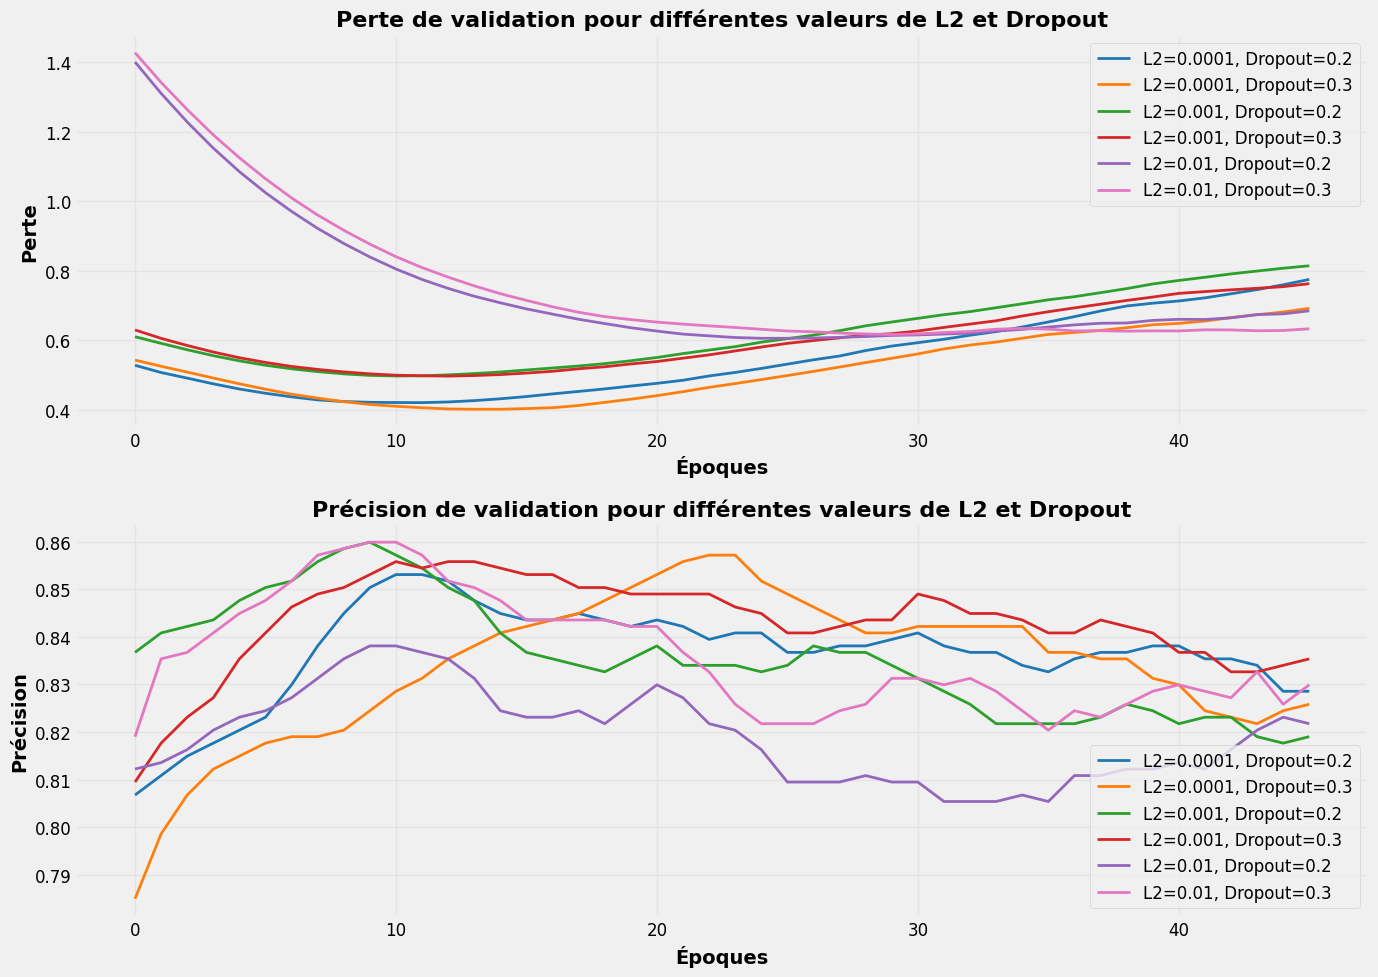

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Définitions des hyperparamètres à tester
l2_values = [0.0001, 0.001, 0.01]
dropout_values = [0.2, 0.3]

# Stockage des résultats
results = {}

# Couleurs personnalisées
custom_colors = [
    "#1F77B4",  # Bleu
    "#FF7F0E",  # Orange
    "#2CA02C",  # Vert
    "#D62728",  # Rouge
    "#9467BD",  # Violet
    "#E377C2",  # Rose
]

# Moyenne glissante pour lisser les courbes
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Entraînement pour chaque combinaison de L2 et Dropout
color_index = 0
for l2_value in l2_values:
    for dropout_value in dropout_values:
        # Création du modèle
        model = Sequential()
        model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(l2_value)))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_value))
        model.add(Dense(64, activation='relu', kernel_regularizer=l2(l2_value)))
        model.add(Dense(1, activation='sigmoid'))

        # Compilation
        optimizer = Adam(learning_rate=0.001)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        # Entraînement
        history = model.fit(
            X_train_scaled, y_train,
            validation_split=0.2,
            epochs=50,
            batch_size=32,
            verbose=0
        )

        # Stockage des résultats
        key = f"L2={l2_value}, Dropout={dropout_value}"
        results[key] = {
            'history': history,
            'color': custom_colors[color_index % len(custom_colors)]
        }
        color_index += 1

# Visualisation des résultats
plt.figure(figsize=(14, 10))

# Graphique pour la perte
plt.subplot(2, 1, 1)
for key, result in results.items():
    smoothed_loss = moving_average(result['history'].history['val_loss'], window_size=5)
    plt.plot(smoothed_loss, label=key, color=result['color'], linewidth=2)
plt.title("Perte de validation pour différentes valeurs de L2 et Dropout", fontsize=16, fontweight='bold')
plt.xlabel("Époques", fontsize=14, fontweight='bold')
plt.ylabel("Perte", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper right')
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Graphique pour la précision
plt.subplot(2, 1, 2)
for key, result in results.items():
    smoothed_accuracy = moving_average(result['history'].history['val_accuracy'], window_size=5)
    plt.plot(smoothed_accuracy, label=key, color=result['color'], linewidth=2)
plt.title("Précision de validation pour différentes valeurs de L2 et Dropout", fontsize=16, fontweight='bold')
plt.xlabel("Époques", fontsize=14, fontweight='bold')
plt.ylabel("Précision", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='lower right')
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


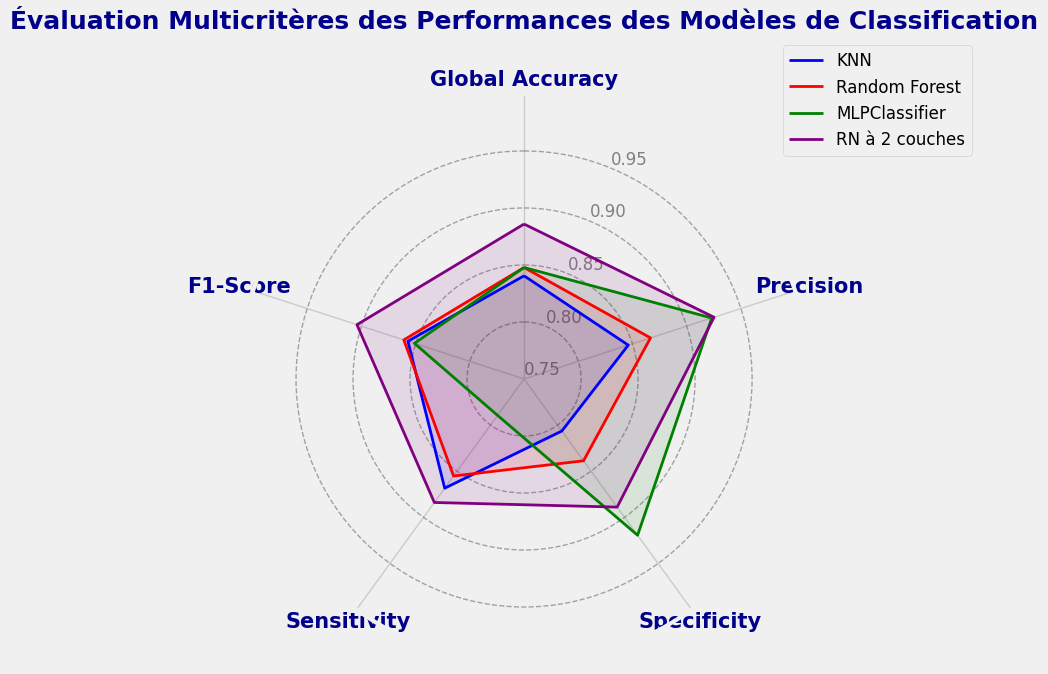

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Données simulées pour comparaison de modèles
models = ['KNN', 'Random Forest', 'MLPClassifier', 'RN à 2 couches']
metrics = ['Global Accuracy', 'Precision', 'Specificity', 'Sensitivity', 'F1-Score']
values = [
    [0.8405, 0.8461, 0.8064, 0.8684, 0.8571],  # KNN
    [0.8478, 0.8666, 0.8387, 0.8552, 0.8609],  # Random Forest
    [0.8478, 0.9231, 0.9194, 0.7895, 0.8511],  # MLPClassifier
    [0.8859, 0.9252, 0.8889, 0.8839, 0.9041]   # RN à 2 couches
]

# Créer la figure et les axes
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))

# Nombre d'angles égaux pour chaque métrique
angles = [n / float(len(metrics)) * 2 * np.pi for n in range(len(metrics))]
angles += angles[:1]  # Répéter le premier angle pour fermer le polygone

# Tracer chaque modèle
colors = ['blue', 'red', 'green', 'purple']
for i, (model, model_values) in enumerate(zip(models, values)):
    # Compléter les valeurs pour fermer le polygone
    complete_values = model_values + [model_values[0]]

    # Tracer les polygones
    ax.plot(angles, complete_values, color=colors[i], linewidth=2, label=model)
    ax.fill(angles, complete_values, color=colors[i], alpha=0.1)

# Personnaliser le graphique
ax.set_theta_offset(np.pi / 2)  # Début en haut
ax.set_theta_direction(-1)  # Sens horaire

# Définir les étiquettes des axes avec une taille plus grande
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics, fontsize=15, fontweight='bold', color='darkblue', ha='center', va='center')

# Ajuster l'échelle des axes radiaux
ax.set_ylim(0.75, 1.0)  # Ajuster la plage pour des différences subtiles
ax.set_yticks([0.75, 0.80, 0.85, 0.90, 0.95])  # Supprimer le tick 1.00
ax.set_yticklabels(['0.75', '0.80', '0.85', '0.90', '0.95'], fontsize=12, color='gray')
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.7)  # Grille subtile

# Ajouter une légende
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)

# Ajouter un titre
ax.set_title('Évaluation Multicritères des Performances des Modèles de Classification', y=1.1, fontsize=18, fontweight='bold', color='darkblue')

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()
